In [4]:
import pandas as pd
import numpy as np

# Load the preprocessed data
modelling_table = pd.read_csv("analyzed_data_nn.csv")

modelling_table['valid_datetime'] = pd.to_datetime(modelling_table['valid_datetime'])
modelling_table['ref_datetime'] = pd.to_datetime(modelling_table['ref_datetime'])

# Define the Pinball function
def pinball(y, q, alpha):
    return (y - q) * alpha * (y >= q) + (q - y) * (1 - alpha) * (y < q)

# Calculate the Pinball Score for q50
def pinball_score_q50(df, alpha=0.5):
    score = pinball(y=df["total_generation_MWh"], q=df["q50"], alpha=alpha).mean()
    return score

# Calculate and print the Pinball Score for q50
score_q50 = pinball_score_q50(modelling_table)
print("Pinball loss for q50 =", score_q50)

Pinball loss for q50 = 35.01391453882956


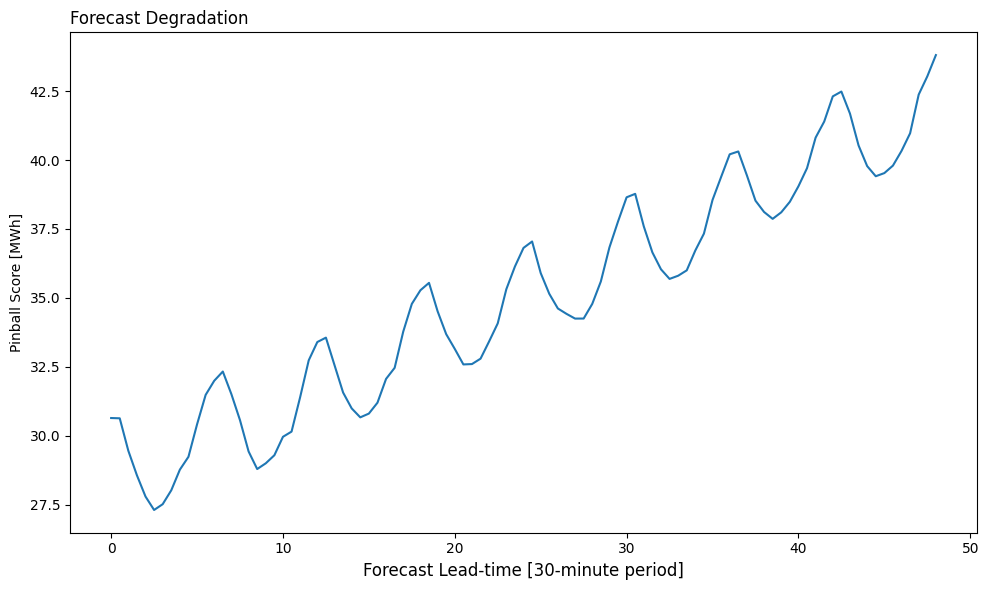

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

modelling_table['lead_time'] = modelling_table['valid_datetime'] - modelling_table['ref_datetime']

forecast_performance = modelling_table.groupby('lead_time').apply(pinball_score_q50)

forecast_performance = modelling_table.groupby('lead_time').apply(pinball_score_q50)
forecast_performance.index = forecast_performance.index.total_seconds() / (3600)

plt.figure(figsize=(10,6))
ax1 = forecast_performance.plot()
ax1.set_ylabel('Pinball Score [MWh]')
ax1.set_xlabel('Forecast Lead-time [hour]', fontsize=12)
ax1.set_title('Forecast Degradation', loc='left')
plt.tight_layout()